In [0]:
import cv2
import numpy as np
from torchvision import models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import torch
import argparse
import imutils
from imutils import paths
import numpy as np
from google.colab.patches import cv2_imshow

#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset")
#args = vars(ap.parse_args())

# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
#imagePaths = sorted(list(paths.list_images(args["dataset"])))
imagePaths= ['A1.jpg', 'A1008.jpg', 'A1015.jpg', 'A1069.jpg', 'A117.jpg', 'A1257.jpg', 'A1320.jpg', 'A1348.jpg', 'A155.jpg', 'A1636.jpg', 'A2014.jpg', 'A2070.jpg', 'A2109.jpg', 'A2298.jpg', 'A2462.jpg', 'A2502.jpg', 'A2741.jpg', 'A2972.jpg', 'A348.jpg', 'A427.jpg', 'A502.jpg', 'A550.jpg', 'A626.jpg', 'A730.jpg', 'A875.jpg']

#fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)

    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]

    rgb = np.stack([r, g, b], axis=2)
    return rgb

def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640),
                   #T.CenterCrop(224),
                   T.ToTensor(),
                   T.Normalize(mean = [0.485, 0.456, 0.406],
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()
  return rgb


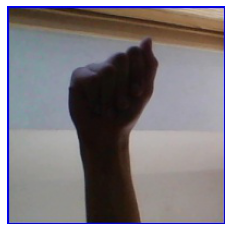

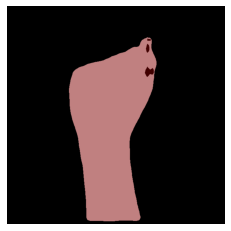

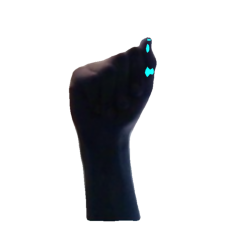

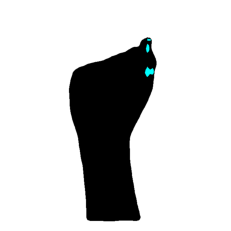

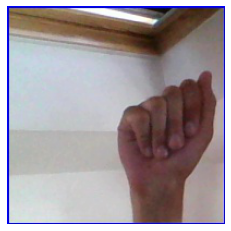

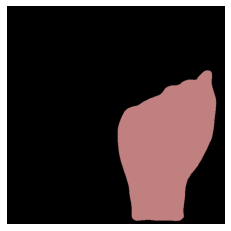

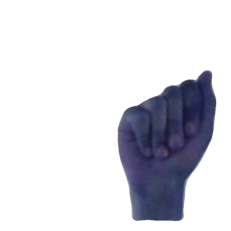

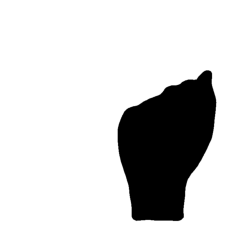

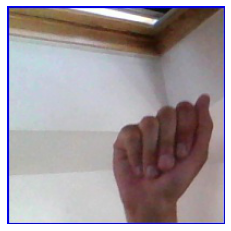

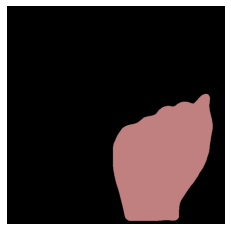

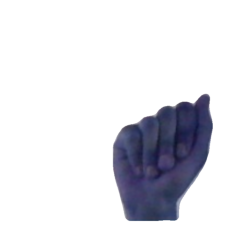

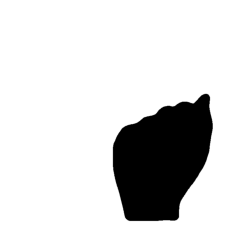

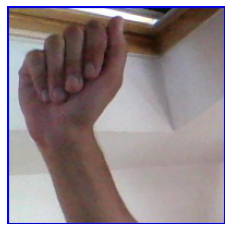

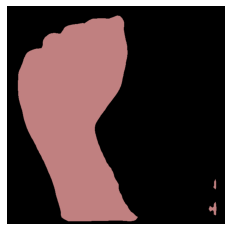

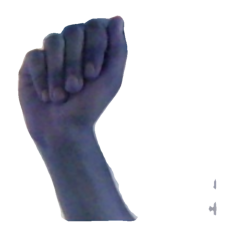

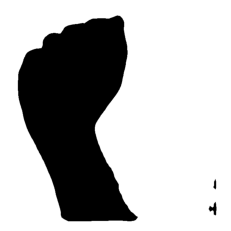

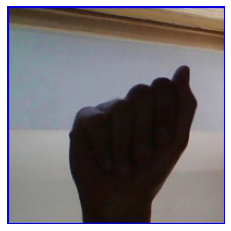

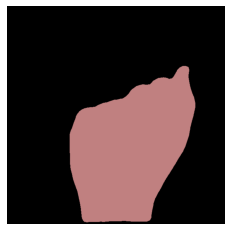

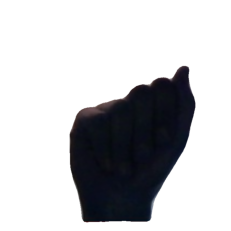

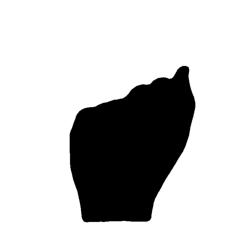

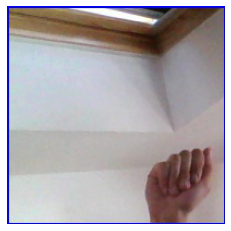

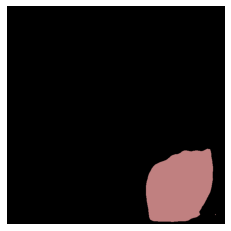

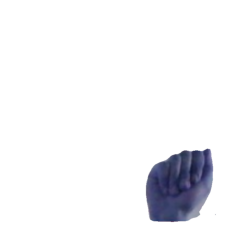

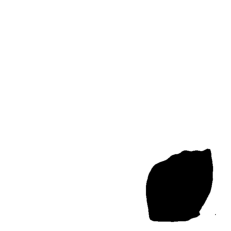

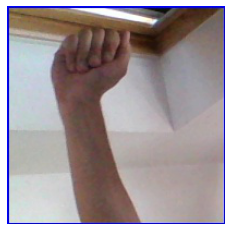

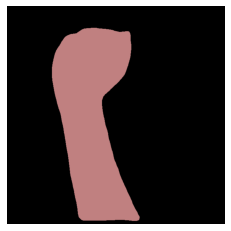

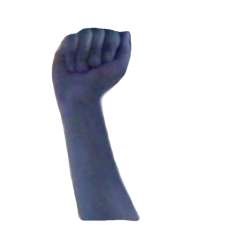

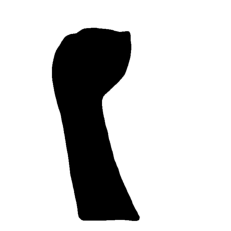

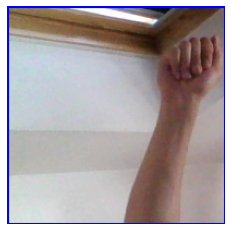

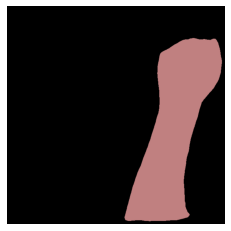

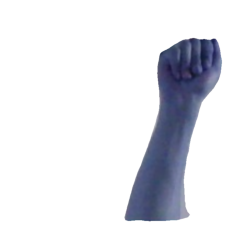

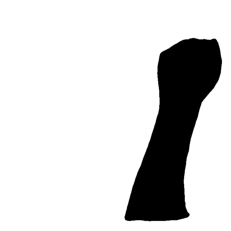

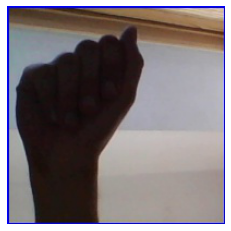

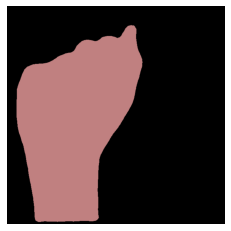

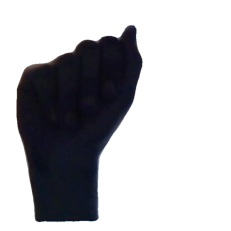

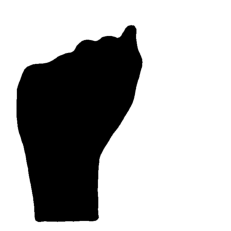

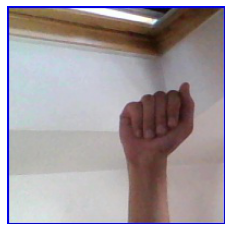

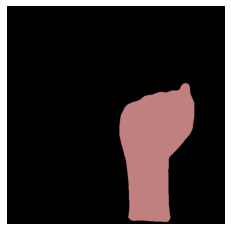

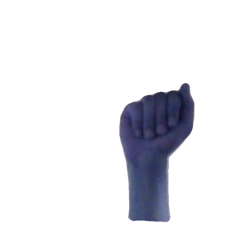

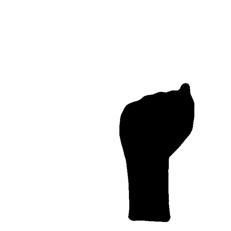

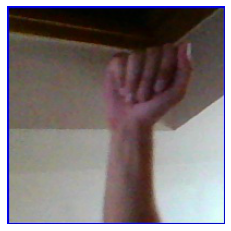

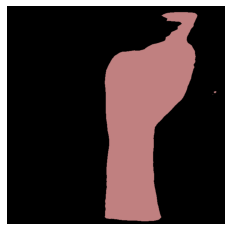

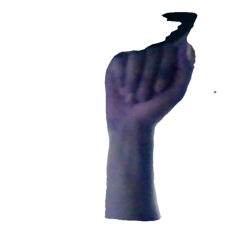

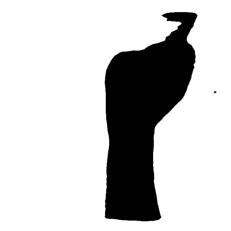

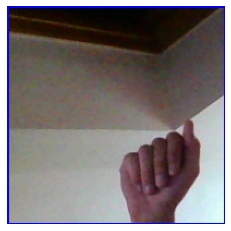

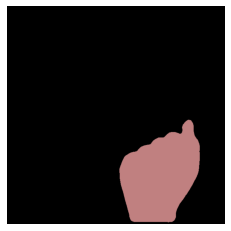

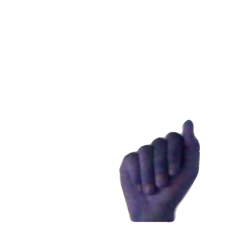

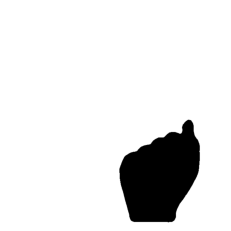

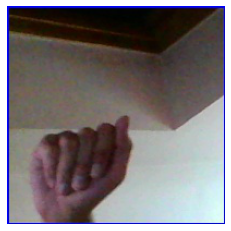

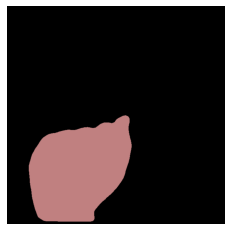

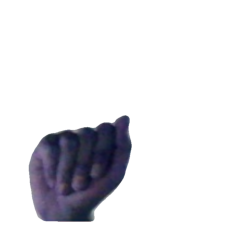

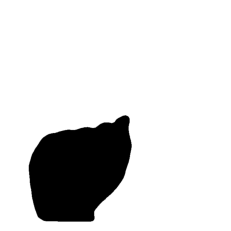

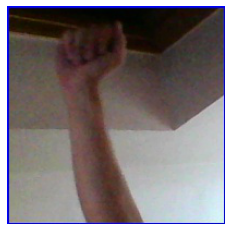

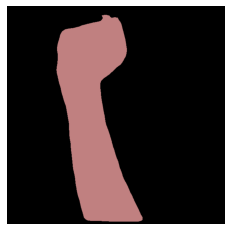

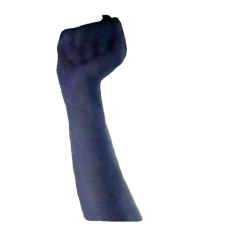

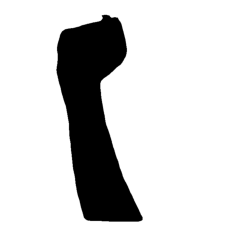

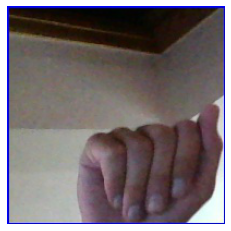

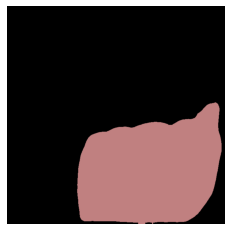

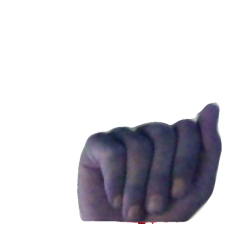

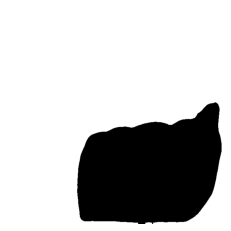

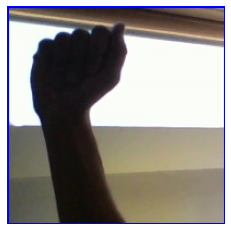

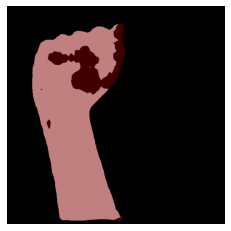

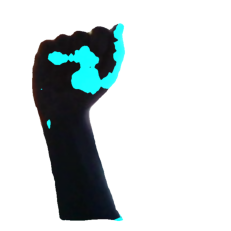

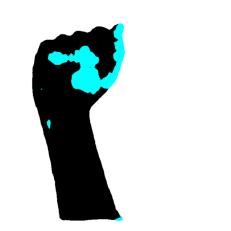

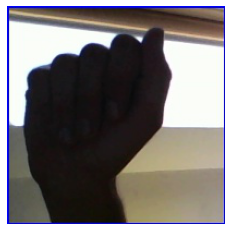

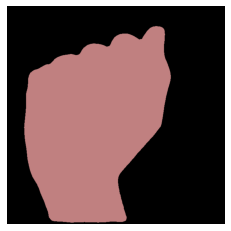

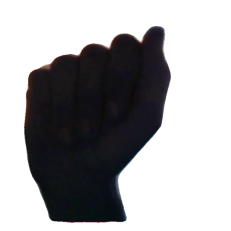

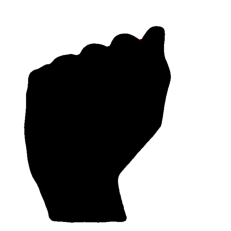

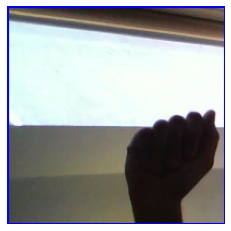

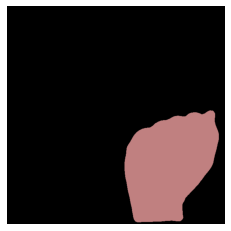

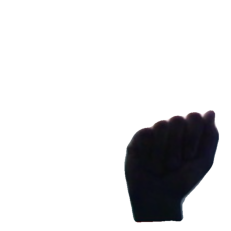

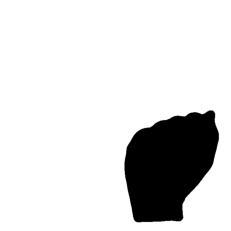

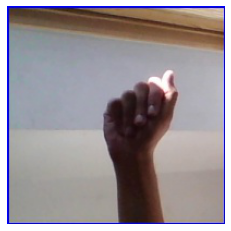

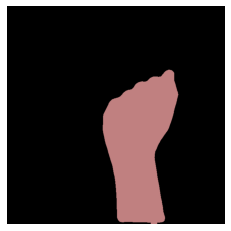

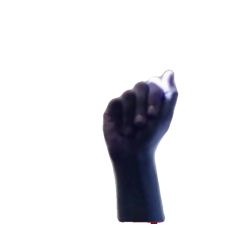

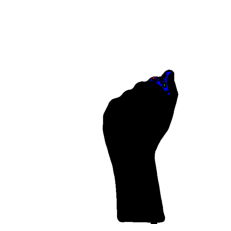

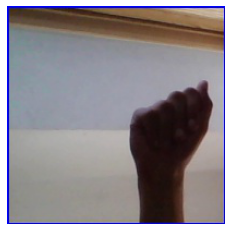

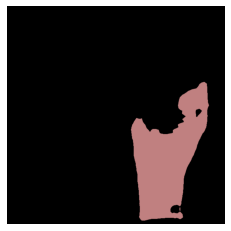

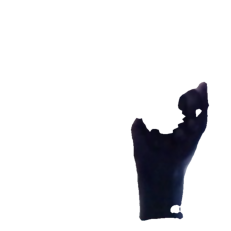

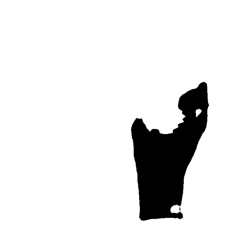

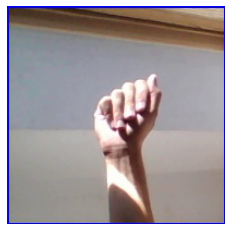

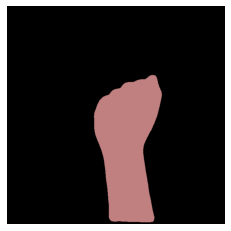

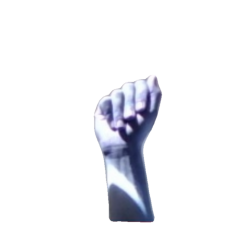

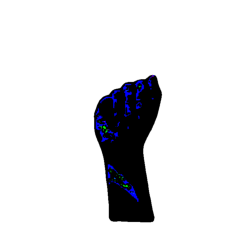

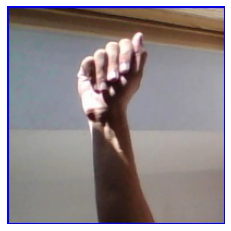

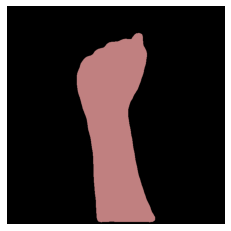

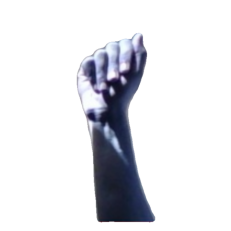

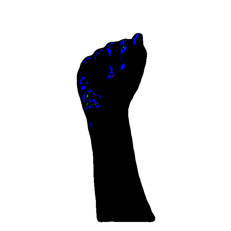

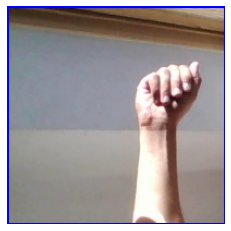

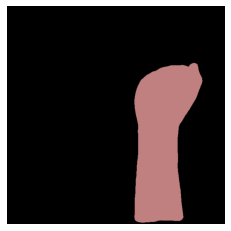

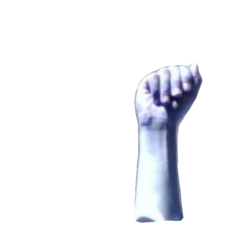

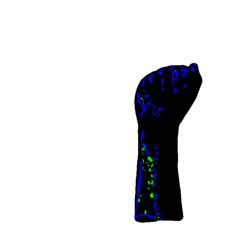

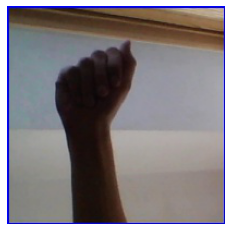

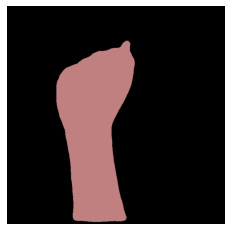

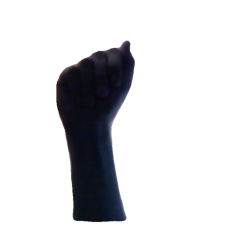

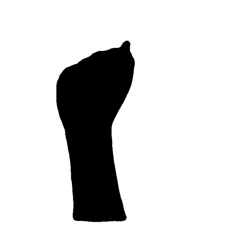

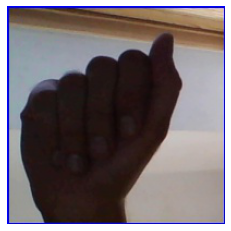

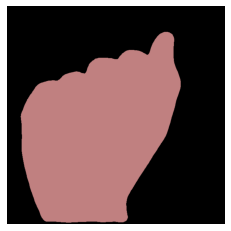

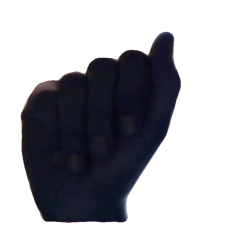

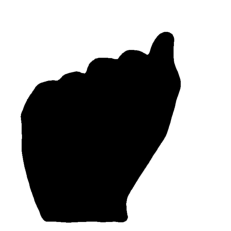

In [0]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (640,640))
    mask = segment(dlab, imagePath)
    image[np.where(mask == 0)] = 255
    bw = image
    plt.imshow(image); plt.axis('off'); plt.show()
    bw[np.where(image != 255)] = 0
    plt.imshow(bw); plt.axis('off'); plt.show()